In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/homebrew/anaconda3/envs/linear_regession/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./data/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df['ds'] = pd.to_datetime(df['date'])

In [4]:
df['y'] = df['meantemp']

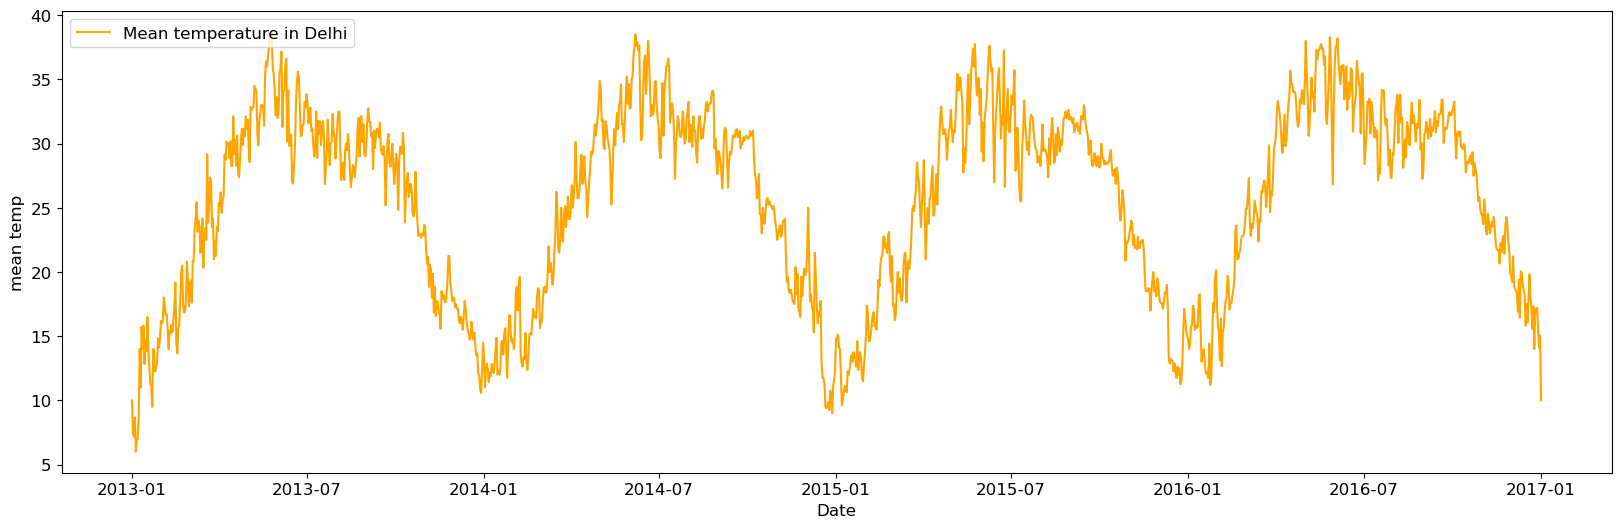

In [6]:
#see the TS plot

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(df.ds, df.y, color='orange', label='Mean temperature in Delhi')
ax.set_xlabel('Date')
ax.set_ylabel('mean temp')
ax.legend(loc='upper left')

In [10]:
#Prophet project
m = Prophet()

#Fit with default settings
m.fit(df)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=120)
#Forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

13:16:47 - cmdstanpy - INFO - Chain [1] start processing
13:16:47 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1577,2017-04-27,34.049427,31.527607,36.507038
1578,2017-04-28,34.147262,31.719633,36.655774
1579,2017-04-29,34.180607,31.594042,36.763776
1580,2017-04-30,34.177377,31.799547,36.784808
1581,2017-05-01,34.477466,31.979061,37.197836


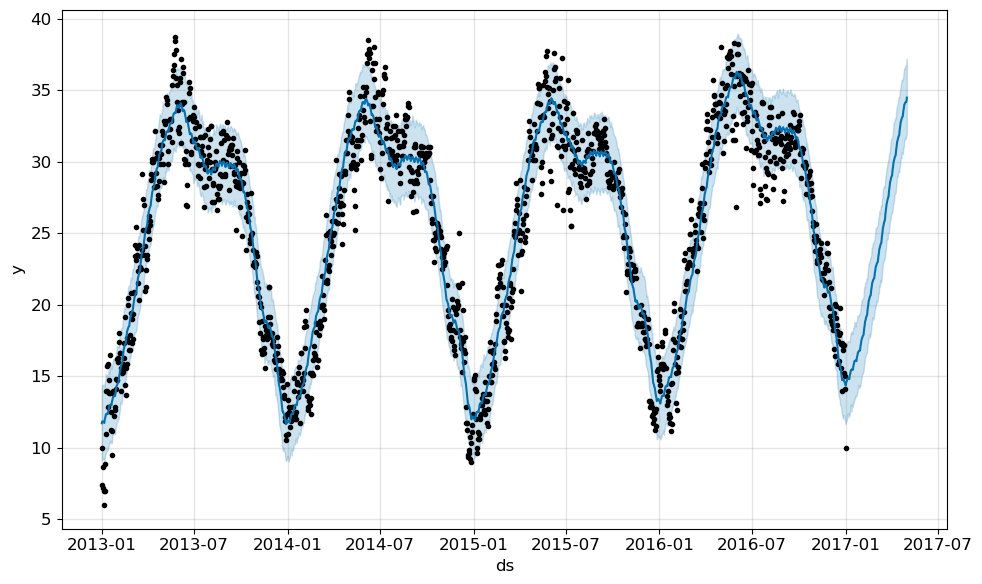

In [12]:
fig1 = m.plot(forecast)

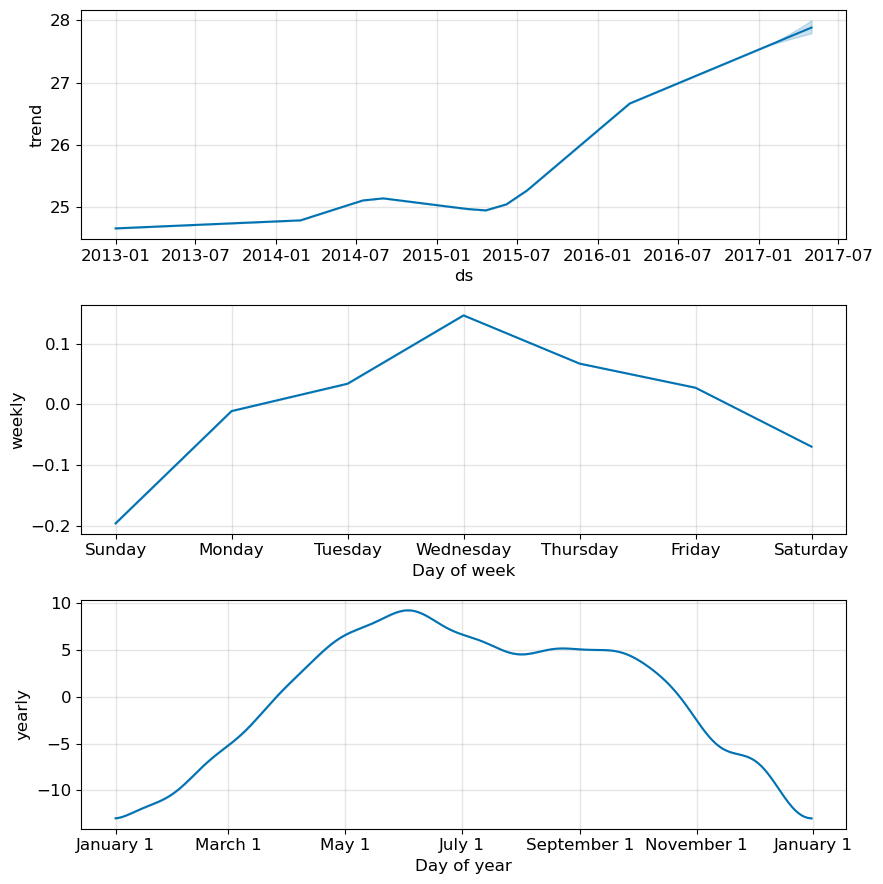

In [13]:
fig2 = m.plot_components(forecast)

#### Practice

In [14]:
transactions = pd.read_csv("./data/transactions.csv").sort_values(["store_nbr", "date"])
transactions["date"] = pd.to_datetime(transactions.date)

In [17]:
transactions = transactions[transactions['store_nbr']==3]
transactions

,date,store_nbr,transactions
3,2013-01-02,3,3487
49,2013-01-03,3,3026
95,2013-01-04,3,3188
141,2013-01-05,3,3623
187,2013-01-06,3,3590
...,...,...,...
83220,2017-08-11,3,2991
83274,2017-08-12,3,3070
83328,2017-08-13,3,3075
83382,2017-08-14,3,3036


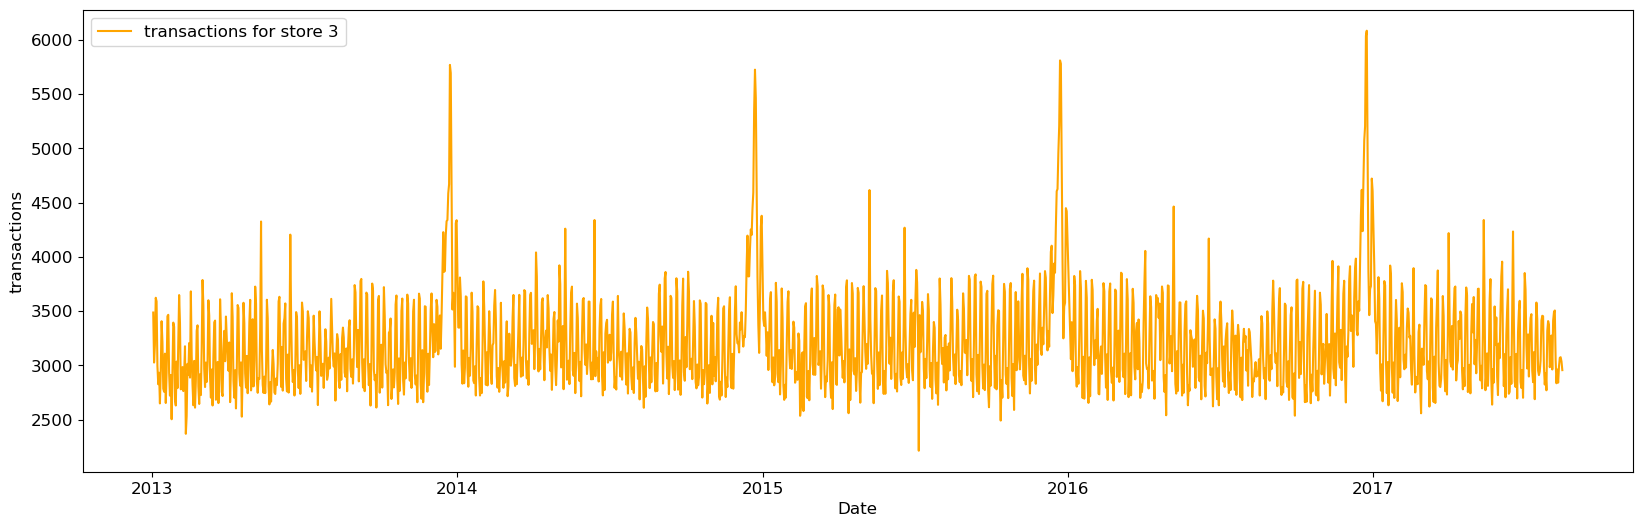

In [18]:
transactions['ds'] = pd.to_datetime(transactions['date'])
transactions['y'] = transactions['transactions']

#see the TS plot

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(transactions.ds, transactions.y, color='orange', label='transactions for store 3')
ax.set_xlabel('Date')
ax.set_ylabel('transactions')
ax.legend(loc='upper left')

In [31]:
retail_holidays = pd.DataFrame({
    'holiday': 'retail_event',
    'ds': pd.to_datetime(['2013-11-29', '2014-11-28', '2015-11-27', '2016-11-25', '2017-11-24', '2018-11-23']),
    'lower_window': 0,
    'upper_window': 1,
})


m = Prophet(holidays=retail_holidays)
m.add_country_holidays(country_name='US')
m.fit(transactions)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

13:54:23 - cmdstanpy - INFO - Chain [1] start processing
13:54:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,3086.226810,3277.850449,3905.545954,3086.226810,3086.226810,0.0,0.0,0.0,0.0,...,-57.347932,-57.347932,-57.347932,562.453490,562.453490,562.453490,0.0,0.0,0.0,3591.332367
1,2013-01-03,3086.593047,2930.671099,3527.556147,3086.593047,3086.593047,0.0,0.0,0.0,0.0,...,-320.465916,-320.465916,-320.465916,482.515632,482.515632,482.515632,0.0,0.0,0.0,3248.642762
2,2013-01-04,3086.959284,3212.078385,3826.051122,3086.959284,3086.959284,0.0,0.0,0.0,0.0,...,29.960840,29.960840,29.960840,402.691915,402.691915,402.691915,0.0,0.0,0.0,3519.612039
3,2013-01-05,3087.325521,3559.362098,4172.840657,3087.325521,3087.325521,0.0,0.0,0.0,0.0,...,451.593094,451.593094,451.593094,324.185562,324.185562,324.185562,0.0,0.0,0.0,3863.104177
4,2013-01-06,3087.691758,3360.689929,3976.335278,3087.691758,3087.691758,0.0,0.0,0.0,0.0,...,342.452369,342.452369,342.452369,248.135584,248.135584,248.135584,0.0,0.0,0.0,3678.279711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2018-08-11,3271.567884,3225.253848,3826.852703,3251.147248,3293.212768,0.0,0.0,0.0,0.0,...,451.593094,451.593094,451.593094,-202.195506,-202.195506,-202.195506,0.0,0.0,0.0,3520.965472
2037,2018-08-12,3271.618832,3107.112558,3712.746187,3251.053930,3293.351372,0.0,0.0,0.0,0.0,...,342.452369,342.452369,342.452369,-201.937944,-201.937944,-201.937944,0.0,0.0,0.0,3412.133258
2038,2018-08-13,3271.669781,2579.966561,3208.997759,3250.978933,3293.492919,0.0,0.0,0.0,0.0,...,-173.130456,-173.130456,-173.130456,-199.431146,-199.431146,-199.431146,0.0,0.0,0.0,2899.108178
2039,2018-08-14,3271.720729,2503.330335,3091.946386,3250.855501,3293.634467,0.0,0.0,0.0,0.0,...,-273.061998,-273.061998,-273.061998,-194.655477,-194.655477,-194.655477,0.0,0.0,0.0,2804.003254


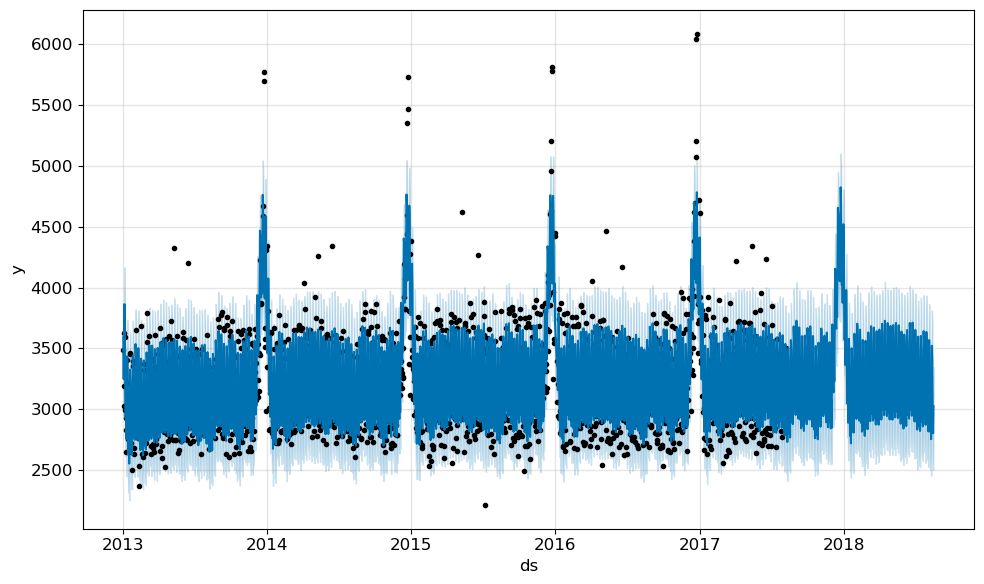

In [27]:
fig1 = m.plot(forecast)

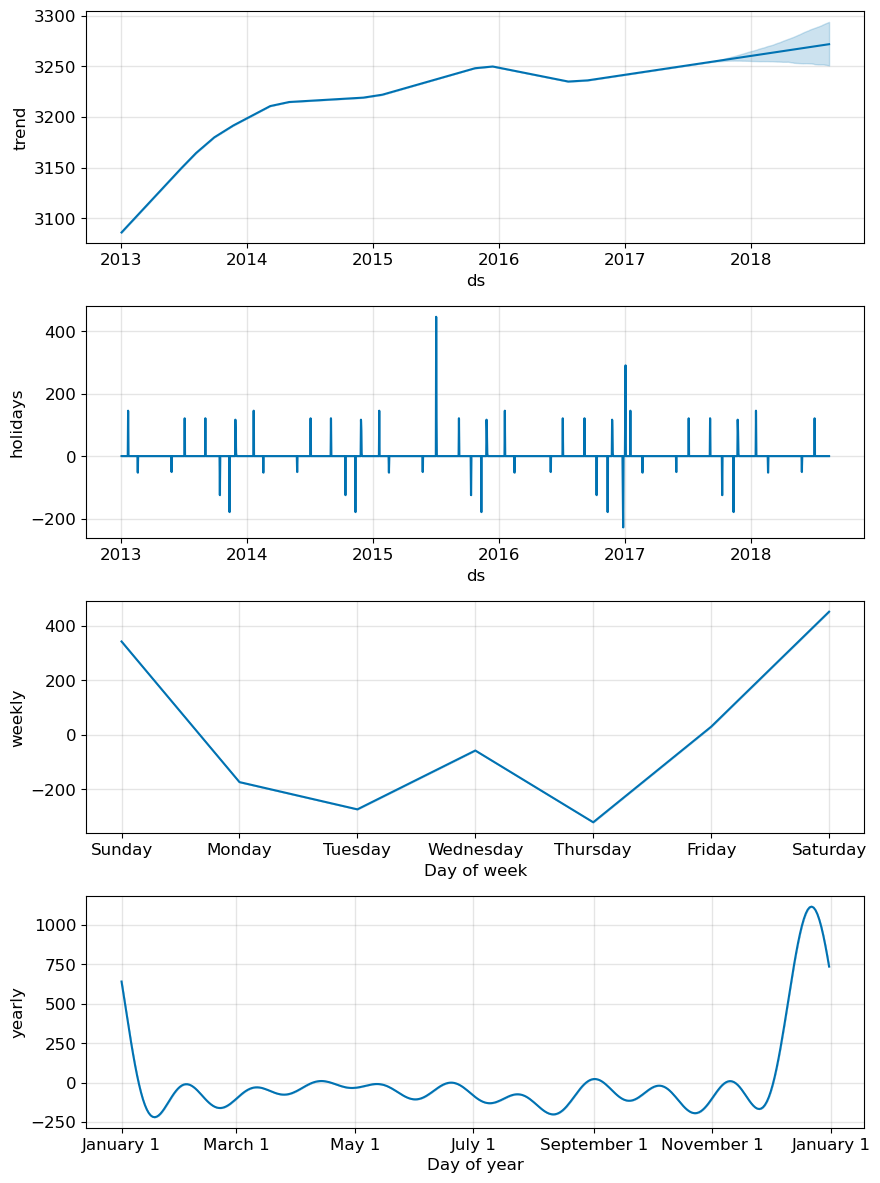

In [36]:
fig2 = m.plot_components(forecast)